# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [4]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
penguins = sns.load_dataset('penguins')

In [6]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [34]:
# seu código aqui

In [36]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [38]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [40]:
penguins.dropna(subset=['bill_length_mm'], inplace=True)

In [42]:
penguins.dropna(subset=['bill_depth_mm'], inplace=True)

In [44]:
penguins.dropna(subset=['flipper_length_mm'], inplace=True)

In [46]:
penguins.dropna(subset=['body_mass_g'], inplace=True)

In [48]:
penguins.dropna(subset=['sex'], inplace=True)

In [50]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [54]:
penguins.drop(columns=['species'], inplace=True)

In [56]:
penguins.drop(columns=['island'], inplace=True)

In [58]:
penguins.drop(columns=['sex'], inplace=True)

In [60]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     333 non-null    float64
 1   bill_depth_mm      333 non-null    float64
 2   flipper_length_mm  333 non-null    float64
 3   body_mass_g        333 non-null    float64
dtypes: float64(4)
memory usage: 13.0 KB


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

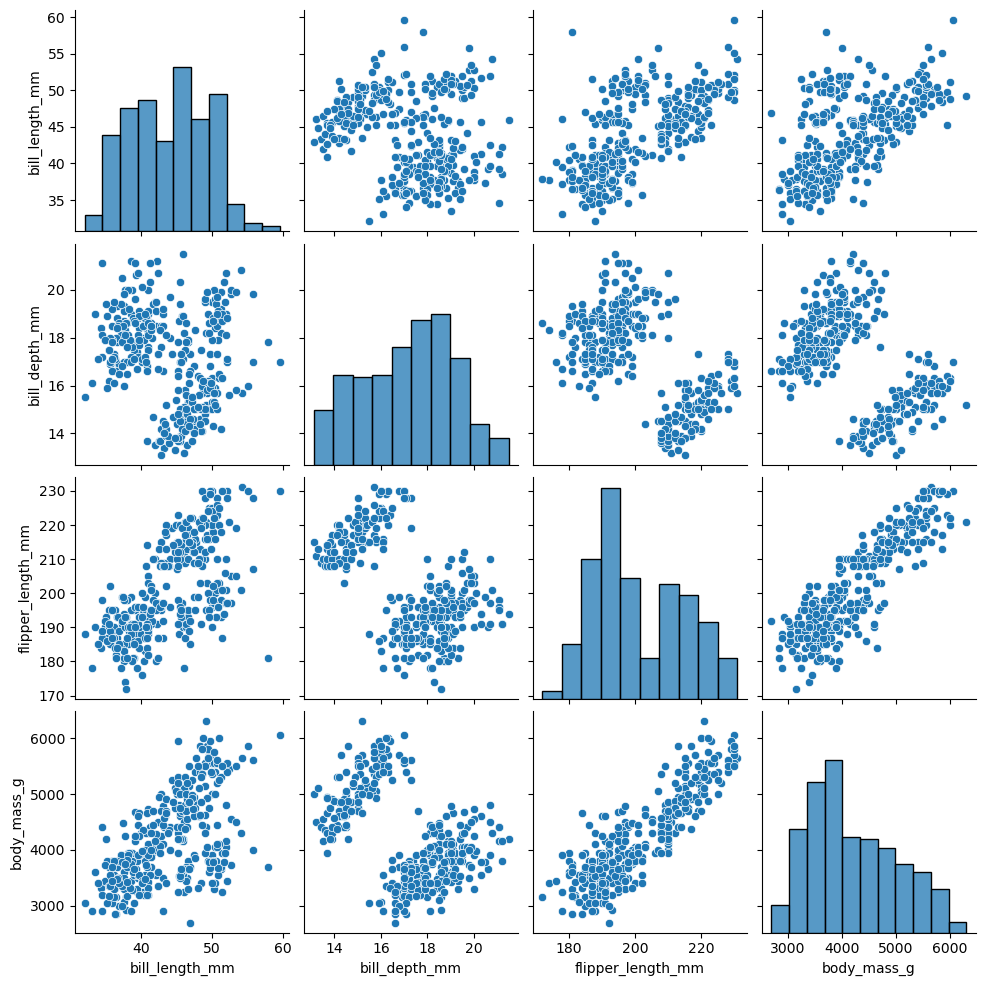

In [62]:
# seu código aqui
sns.pairplot(penguins)

Dá pra ter uma pequena ideia de que haverão divisões, mas impossível dizer quantas, os dados estão bem concentrados.

# 3 - Realize a padronização dos dados e visualize os dados.

In [74]:
# seu código aqui
penguins_padronizado = penguins.copy()

colunas_padronizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g']

scaler = StandardScaler()

penguins_padronizado[colunas_padronizar] = scaler.fit_transform(penguins[colunas_padronizar])

In [76]:
penguins_padronizado

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
4,-1.335566,1.085877,-0.569284,-0.941606
5,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
338,0.587352,-1.762145,0.931283,0.892957
340,0.514098,-1.457000,1.002739,0.799674
341,1.173384,-0.744994,1.502928,1.919069
342,0.221082,-1.202712,0.788372,1.234995


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [78]:
# seu código aqui
kmeans_penguins = KMeans (n_clusters=3, n_init=10, random_state=42)
kmeans_penguins.fit(penguins_padronizado)

C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=42)

In [82]:
centroides_padronizados = kmeans_penguins.cluster_centers_
centroides_padronizados

array([[-1.04680889,  0.48662566, -0.88169491, -0.7627539 ],
       [ 0.65475809, -1.10270671,  1.16246305,  1.10121078],
       [ 0.67202511,  0.80526339, -0.28934658, -0.38410387]])

In [84]:
centroides_originais = scaler.inverse_transform(centroides_padronizados)
centroides_originais

array([[  38.27674419,   18.12170543,  188.62790698, 3593.79844961],
       [  47.56806723,   14.99663866,  217.23529412, 5092.43697479],
       [  47.66235294,   18.74823529,  196.91764706, 3898.23529412]])

# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

In [86]:
# seu código aqui
labels = kmeans_penguins.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

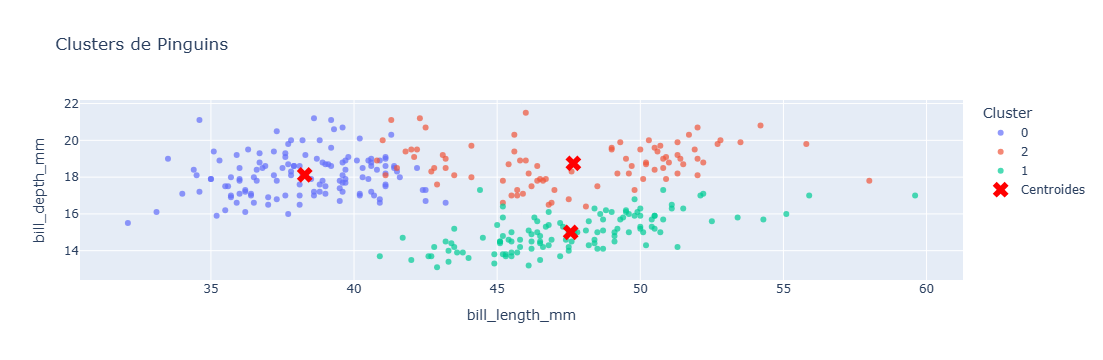

In [89]:
df_clusters = pd.DataFrame({
    'bill_length_mm': penguins['bill_length_mm'],
    'bill_depth_mm': penguins['bill_depth_mm'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='bill_length_mm', y='bill_depth_mm', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 1],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='bill_length_mm', yaxis_title='bill_depth_mm',
                  legend_title='Cluster')
fig.show()

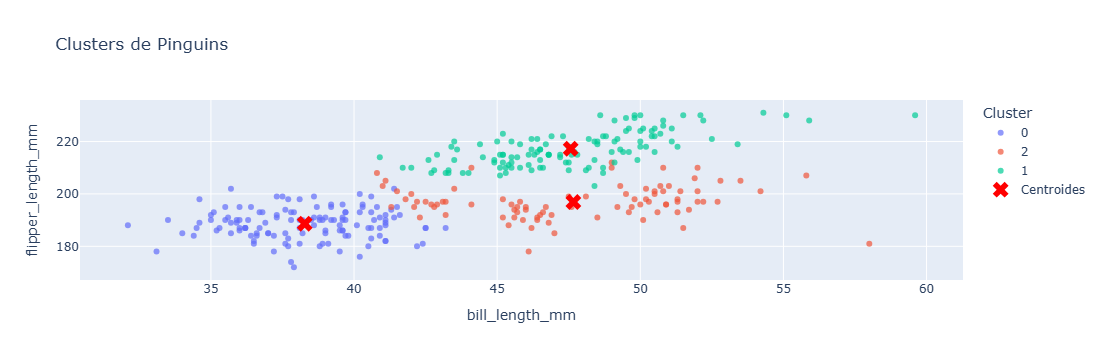

In [93]:
df_clusters = pd.DataFrame({
    'bill_length_mm': penguins['bill_length_mm'],
    'flipper_length_mm': penguins['flipper_length_mm'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='bill_length_mm', y='flipper_length_mm', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='bill_length_mm', yaxis_title='flipper_length_mm',
                  legend_title='Cluster')
fig.show()

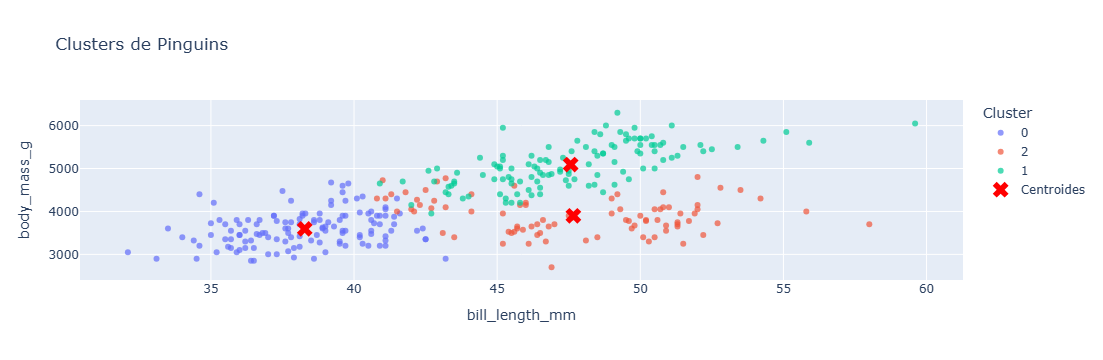

In [95]:
df_clusters = pd.DataFrame({
    'bill_length_mm': penguins['bill_length_mm'],
    'body_mass_g': penguins['body_mass_g'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='bill_length_mm', y='body_mass_g', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 0], y=centroides_originais[:, 3],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='bill_length_mm', yaxis_title='body_mass_g',
                  legend_title='Cluster')
fig.show()

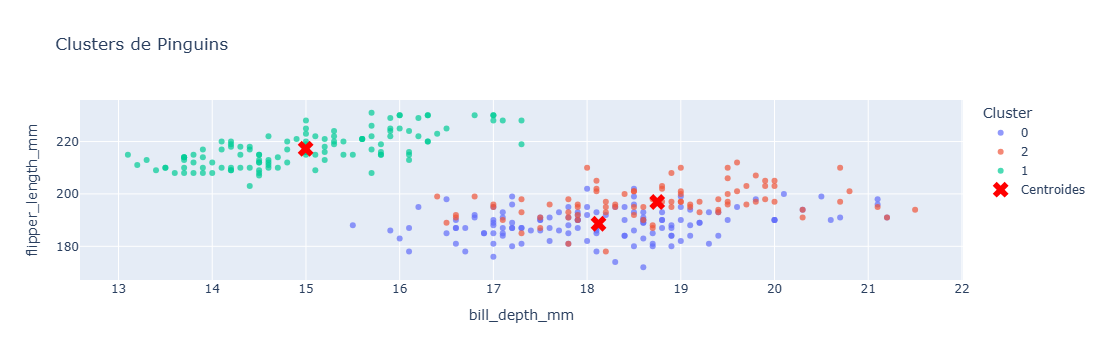

In [97]:
df_clusters = pd.DataFrame({
    'bill_depth_mm': penguins['bill_depth_mm'],
    'flipper_length_mm': penguins['flipper_length_mm'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='bill_depth_mm', y='flipper_length_mm', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 1], y=centroides_originais[:, 2],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='bill_depth_mm', yaxis_title='flipper_length_mm',
                  legend_title='Cluster')
fig.show()

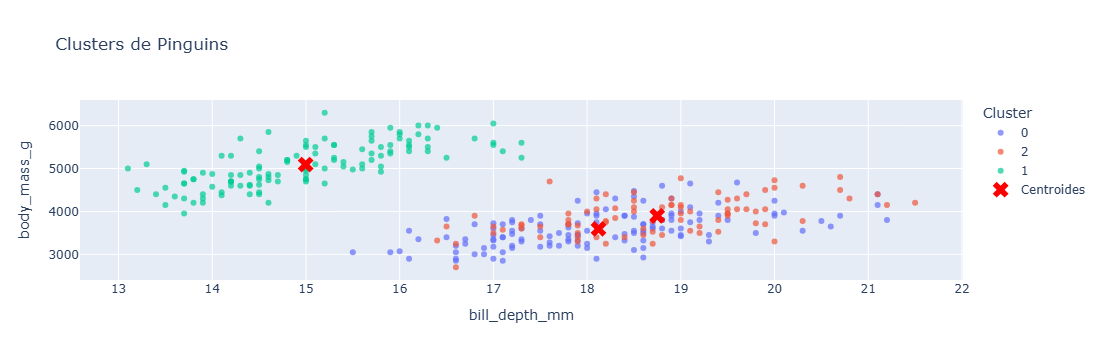

In [99]:
df_clusters = pd.DataFrame({
    'bill_depth_mm': penguins['bill_depth_mm'],
    'body_mass_g': penguins['body_mass_g'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='bill_depth_mm', y='body_mass_g', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 1], y=centroides_originais[:, 3],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='bill_depth_mm', yaxis_title='body_mass_g',
                  legend_title='Cluster')
fig.show()

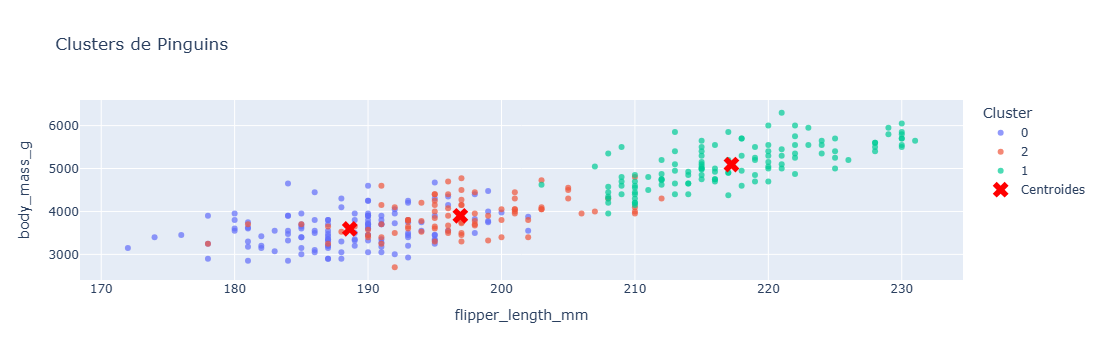

In [101]:
df_clusters = pd.DataFrame({
    'flipper_length_mm': penguins['flipper_length_mm'],
    'body_mass_g': penguins['body_mass_g'],
    'cluster': labels.astype(str)
})

fig = px.scatter(df_clusters, x='flipper_length_mm', y='body_mass_g', color='cluster',
                 color_continuous_scale='viridis', opacity=0.7,
                 title='Clusters de Pinguins')

fig.add_scatter(x=centroides_originais[:, 2], y=centroides_originais[:, 3],
                mode='markers', marker=dict(color='red', symbol='x', size=14),
                name='Centroides')


fig.update_layout(xaxis_title='flipper_length_mm', yaxis_title='body_mass_g',
                  legend_title='Cluster')
fig.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

• Um exemplo é a divisão de clientes baseados em compras por exemplo, para separarmos em grupos e indicarmos produtos para futuras compras com base nas informações históricas de compras.

• Streaming pode ser um bom exemplo, com a máquina agrupando os perfis com base no que assistem, para recomendarem filmes ou séries ideais para assistirem com base no que foi assistido.

• Outro similar ao último é aplicativos de música, que agrupam os clientes com base no que foi escutado, e dá recomendações de estilos musicais, bandas, e outros com base no que foi escutado.